In [1]:
import numpy as np
import pandas as pd





In [2]:
train_df = pd.read_csv("train.csv")
print(train_df.shape)
test_df = pd.read_csv("test.csv")
print(test_df.shape)

com_df = pd.concat([train_df,test_df], axis = 0)

(1460, 81)
(1459, 80)


C:\Users\Acer\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  


In [3]:
com_df.head()

,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,...,SaleType,ScreenPorch,Street,TotRmsAbvGrd,TotalBsmtSF,Utilities,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold
0,856,854,0,NaN,3,1Fam,TA,No,706.0,0.0,...,WD,0,Pave,8,856.0,AllPub,0,2003,2003,2008
1,1262,0,0,NaN,3,1Fam,TA,Gd,978.0,0.0,...,WD,0,Pave,6,1262.0,AllPub,298,1976,1976,2007
2,920,866,0,NaN,3,1Fam,TA,Mn,486.0,0.0,...,WD,0,Pave,6,920.0,AllPub,0,2001,2002,2008
3,961,756,0,NaN,3,1Fam,Gd,No,216.0,0.0,...,WD,0,Pave,7,756.0,AllPub,0,1915,1970,2006
4,1145,1053,0,NaN,4,1Fam,TA,Av,655.0,0.0,...,WD,0,Pave,9,1145.0,AllPub,192,2000,2000,2008


In [4]:
com_df.columns

Index(['1stFlrSF', '2ndFlrSF', '3SsnPorch', 'Alley', 'BedroomAbvGr',
       'BldgType', 'BsmtCond', 'BsmtExposure', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtFinType1', 'BsmtFinType2', 'BsmtFullBath', 'BsmtHalfBath',
       'BsmtQual', 'BsmtUnfSF', 'CentralAir', 'Condition1', 'Condition2',
       'Electrical', 'EnclosedPorch', 'ExterCond', 'ExterQual', 'Exterior1st',
       'Exterior2nd', 'Fence', 'FireplaceQu', 'Fireplaces', 'Foundation',
       'FullBath', 'Functional', 'GarageArea', 'GarageCars', 'GarageCond',
       'GarageFinish', 'GarageQual', 'GarageType', 'GarageYrBlt', 'GrLivArea',
       'HalfBath', 'Heating', 'HeatingQC', 'HouseStyle', 'Id', 'KitchenAbvGr',
       'KitchenQual', 'LandContour', 'LandSlope', 'LotArea', 'LotConfig',
       'LotFrontage', 'LotShape', 'LowQualFinSF', 'MSSubClass', 'MSZoning',
       'MasVnrArea', 'MasVnrType', 'MiscFeature', 'MiscVal', 'MoSold',
       'Neighborhood', 'OpenPorchSF', 'OverallCond', 'OverallQual',
       'PavedDrive', 'PoolArea', 'Po

In [5]:
com_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 0 to 1458
Data columns (total 81 columns):
1stFlrSF         2919 non-null int64
2ndFlrSF         2919 non-null int64
3SsnPorch        2919 non-null int64
Alley            198 non-null object
BedroomAbvGr     2919 non-null int64
BldgType         2919 non-null object
BsmtCond         2837 non-null object
BsmtExposure     2837 non-null object
BsmtFinSF1       2918 non-null float64
BsmtFinSF2       2918 non-null float64
BsmtFinType1     2840 non-null object
BsmtFinType2     2839 non-null object
BsmtFullBath     2917 non-null float64
BsmtHalfBath     2917 non-null float64
BsmtQual         2838 non-null object
BsmtUnfSF        2918 non-null float64
CentralAir       2919 non-null object
Condition1       2919 non-null object
Condition2       2919 non-null object
Electrical       2918 non-null object
EnclosedPorch    2919 non-null int64
ExterCond        2919 non-null object
ExterQual        2919 non-null object
Exterior1st      291

In [6]:
target = com_df["SalePrice"]
com_df = com_df.drop("SalePrice", axis =1)

In [7]:
target.head()
# type(target)

0    208500.0
1    181500.0
2    223500.0
3    140000.0
4    250000.0
Name: SalePrice, dtype: float64

In [8]:
com_df.shape

(2919, 80)

In [9]:
com_df.isnull().any().sum()

34

In [10]:
type(com_df)

pandas.core.frame.DataFrame

In [11]:
type(com_df)

pandas.core.frame.DataFrame

In [12]:
com_df.loc[:,com_df.isnull().any()].head()

,Alley,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,BsmtFinType1,BsmtFinType2,BsmtFullBath,BsmtHalfBath,BsmtQual,...,KitchenQual,LotFrontage,MSZoning,MasVnrArea,MasVnrType,MiscFeature,PoolQC,SaleType,TotalBsmtSF,Utilities
0,NaN,TA,No,706.0,0.0,GLQ,Unf,1.0,0.0,Gd,...,Gd,65.0,RL,196.0,BrkFace,NaN,NaN,WD,856.0,AllPub
1,NaN,TA,Gd,978.0,0.0,ALQ,Unf,0.0,1.0,Gd,...,TA,80.0,RL,0.0,None,NaN,NaN,WD,1262.0,AllPub
2,NaN,TA,Mn,486.0,0.0,GLQ,Unf,1.0,0.0,Gd,...,Gd,68.0,RL,162.0,BrkFace,NaN,NaN,WD,920.0,AllPub
3,NaN,Gd,No,216.0,0.0,ALQ,Unf,1.0,0.0,TA,...,Gd,60.0,RL,0.0,None,NaN,NaN,WD,756.0,AllPub
4,NaN,TA,Av,655.0,0.0,GLQ,Unf,1.0,0.0,Gd,...,Gd,84.0,RL,350.0,BrkFace,NaN,NaN,WD,1145.0,AllPub


In [14]:
import seaborn as sns

sns.heatmap(com_df.isnull(), yticklabels=False, cbar = False)

In [15]:
# # df = com_df;
for i in com_df.columns:
#     print(i)
    if com_df[i].isnull().sum() > com_df.shape[0]/2:
        com_df.drop([i], axis = 1, inplace = True)
#         com_df = com_df.drop([i], axis = 1, inplace = True)

In [16]:
com_df.shape

(2919, 76)

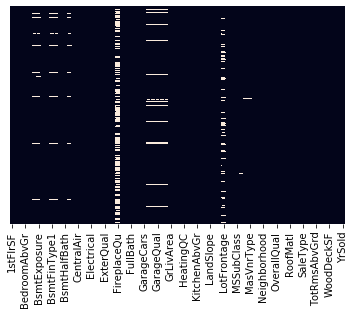

In [17]:
sns.heatmap(com_df.isnull(), yticklabels=False, cbar = False)

In [18]:
def deal_with_missing_value(df):
    for i in df.columns:
        if df[i].dtypes == "object":
            df[i] = df[i].fillna(df[i].mode()[0])

        elif df[i].dtypes == "Int64" or df[i].dtypes == "float64":
            df[i] = df[i].fillna(df[i].mean())


In [19]:
deal_with_missing_value(com_df)

C:\Users\Acer\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DeprecationWarning: Numeric-style type codes are deprecated and will result in an error in the future.
  


In [20]:
com_df.shape

(2919, 76)

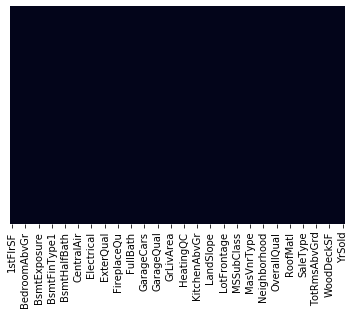

In [21]:
sns.heatmap(com_df.isnull(), yticklabels=False, cbar = False)

In [22]:
# "SalePrice" in com_df.columns
# com_df.drop([0], axis=1, inplace=True)

In [23]:
0 in com_df.columns

False

In [24]:
# train_df = com_df[train_df.shape[0]:]
columns = []
for i in com_df.columns:
    if com_df[i].dtypes == "object":
        columns.append(i)

In [25]:
len(columns)

39

In [26]:
com_df.shape

(2919, 76)

In [27]:
def one_hot(cols):
    df = com_df
    v = 0
    for i in cols:
        print(i)
        cc = pd.get_dummies(com_df[i], drop_first=True)
        com_df.drop([i],axis = 1, inplace = True)
        if v == 0:
            df = cc.copy()
        else:
            df = pd.concat([df, cc], axis = 1)
        v = v+1

    df = pd.concat([com_df, df], axis = 1)
    return df  
        

In [28]:
df = one_hot(columns)

BldgType
BsmtCond
BsmtExposure
BsmtFinType1
BsmtFinType2
BsmtQual
CentralAir
Condition1
Condition2
Electrical
ExterCond
ExterQual
Exterior1st
Exterior2nd
FireplaceQu
Foundation
Functional
GarageCond
GarageFinish
GarageQual
GarageType
Heating
HeatingQC
HouseStyle
KitchenQual
LandContour
LandSlope
LotConfig
LotShape
MSZoning
MasVnrType
Neighborhood
PavedDrive
RoofMatl
RoofStyle
SaleCondition
SaleType
Street
Utilities


In [29]:
df.shape

(2919, 237)

In [30]:
df.shape

(2919, 237)

In [31]:
df = df.loc[:,~df.columns.duplicated()]

In [32]:
df.shape

(2919, 177)

In [33]:
df.head()

,1stFlrSF,2ndFlrSF,3SsnPorch,BedroomAbvGr,BsmtFinSF1,BsmtFinSF2,BsmtFullBath,BsmtHalfBath,BsmtUnfSF,EnclosedPorch,...,CWD,Con,ConLD,ConLI,ConLw,New,Oth,WD,Pave,NoSeWa
0,856,854,0,3,706.0,0.0,1.0,0.0,150.0,0,...,0,0,0,0,0,0,0,1,1,0
1,1262,0,0,3,978.0,0.0,0.0,1.0,284.0,0,...,0,0,0,0,0,0,0,1,1,0
2,920,866,0,3,486.0,0.0,1.0,0.0,434.0,0,...,0,0,0,0,0,0,0,1,1,0
3,961,756,0,3,216.0,0.0,1.0,0.0,540.0,272,...,0,0,0,0,0,0,0,1,1,0
4,1145,1053,0,4,655.0,0.0,1.0,0.0,490.0,0,...,0,0,0,0,0,0,0,1,1,0


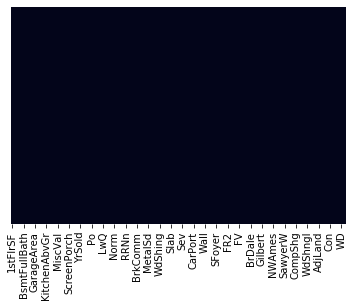

In [34]:
sns.heatmap(df.isnull(), yticklabels=False, cbar = False)

In [35]:
train_df = df.iloc[:1460,:]

In [36]:
test_df = df.iloc[1460:,:]

In [37]:
target = target.dropna()
train_df["SalePrice"] = target

C:\Users\Acer\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [38]:
train_df.head()

,1stFlrSF,2ndFlrSF,3SsnPorch,BedroomAbvGr,BsmtFinSF1,BsmtFinSF2,BsmtFullBath,BsmtHalfBath,BsmtUnfSF,EnclosedPorch,...,Con,ConLD,ConLI,ConLw,New,Oth,WD,Pave,NoSeWa,SalePrice
0,856,854,0,3,706.0,0.0,1.0,0.0,150.0,0,...,0,0,0,0,0,0,1,1,0,208500.0
1,1262,0,0,3,978.0,0.0,0.0,1.0,284.0,0,...,0,0,0,0,0,0,1,1,0,181500.0
2,920,866,0,3,486.0,0.0,1.0,0.0,434.0,0,...,0,0,0,0,0,0,1,1,0,223500.0
3,961,756,0,3,216.0,0.0,1.0,0.0,540.0,272,...,0,0,0,0,0,0,1,1,0,140000.0
4,1145,1053,0,4,655.0,0.0,1.0,0.0,490.0,0,...,0,0,0,0,0,0,1,1,0,250000.0


In [39]:
test_df.head()

,1stFlrSF,2ndFlrSF,3SsnPorch,BedroomAbvGr,BsmtFinSF1,BsmtFinSF2,BsmtFullBath,BsmtHalfBath,BsmtUnfSF,EnclosedPorch,...,CWD,Con,ConLD,ConLI,ConLw,New,Oth,WD,Pave,NoSeWa
0,896,0,0,2,468.0,144.0,0.0,0.0,270.0,0,...,0,0,0,0,0,0,0,1,1,0
1,1329,0,0,3,923.0,0.0,0.0,0.0,406.0,0,...,0,0,0,0,0,0,0,1,1,0
2,928,701,0,3,791.0,0.0,0.0,0.0,137.0,0,...,0,0,0,0,0,0,0,1,1,0
3,926,678,0,3,602.0,0.0,0.0,0.0,324.0,0,...,0,0,0,0,0,0,0,1,1,0
4,1280,0,0,2,263.0,0.0,0.0,0.0,1017.0,0,...,0,0,0,0,0,0,0,1,1,0


In [40]:
x_train = train_df.drop(["SalePrice"], axis = 1)
y_train = train_df["SalePrice"]

In [41]:
x_train.shape, y_train.shape

((1460, 177), (1460,))

In [42]:
import xgboost as xgb

In [43]:
regressor = xgb.XGBRegressor()

In [44]:
regressor.fit(x_train,y_train)

C:\Users\Acer\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\Acer\Anaconda3\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


[23:18:33] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [45]:
y_pred = regressor.predict(test_df)

In [46]:
y_pred

array([122810.42 , 153555.64 , 178241.17 , ..., 166376.75 , 121265.766,
       241833.53 ], dtype=float32)

In [47]:
# create sample submission file
pred=pd.DataFrame(y_pred)
sub_df=pd.read_csv('sample_submission.csv')
datasets=pd.concat([sub_df['Id'],pred],axis=1)
datasets.columns=['Id','SalePrice']
datasets.to_csv('sample_submission.csv',index=False)

In [48]:
booster=['gbtree','gblinear']
base_score=[0.25,0.5,0.75,1]

In [49]:
## Hyper Parameter Optimization

n_estimators = [100, 500, 900, 1100, 1500]
max_depth = [2, 3, 5, 10, 15]
booster=['gbtree','gblinear']
learning_rate=[0.05,0.1,0.15,0.20]
min_child_weight=[1,2,3,4]

# Define the grid of hyperparameters to search
hyperparameter_grid = {
    'n_estimators': n_estimators,
    'max_depth':max_depth,
    'learning_rate':learning_rate,
    'min_child_weight':min_child_weight,
    'booster':booster,
    'base_score':base_score
    }

In [52]:
# Set up the random search with 4-fold cross validation
from sklearn.model_selection import RandomizedSearchCV
random_cv = RandomizedSearchCV(estimator=regressor,
            param_distributions=hyperparameter_grid,
            cv=5, n_iter=50,
            scoring = 'neg_mean_absolute_error',n_jobs = 4,
            verbose = 5, 
            return_train_score = True,
            random_state=42)

In [54]:
random_cv.fit(x_train,y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  10 tasks      | elapsed:   55.9s
[Parallel(n_jobs=4)]: Done  64 tasks      | elapsed:  6.9min
[Parallel(n_jobs=4)]: Done 154 tasks      | elapsed: 13.4min
[Parallel(n_jobs=4)]: Done 250 out of 250 | elapsed: 21.7min finished
C:\Users\Acer\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\Acer\Anaconda3\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


[23:45:17] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


RandomizedSearchCV(cv=5, error_score='raise-deprecating',
                   estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                          colsample_bylevel=1,
                                          colsample_bynode=1,
                                          colsample_bytree=1, gamma=0,
                                          importance_type='gain',
                                          learning_rate=0.1, max_delta_step=0,
                                          max_depth=3, min_child_weight=1,
                                          missing=None, n_estimators=100,
                                          n_jobs=1, nthread=None,
                                          objective='reg:linear',
                                          random_st...
                   iid='warn', n_iter=50, n_jobs=4,
                   param_distributions={'base_score': [0.25, 0.5, 0.75, 1],
                                        'booster': ['gbtree',

In [55]:
random_cv.best_estimator_

XGBRegressor(base_score=0.25, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=2, min_child_weight=1, missing=None, n_estimators=900,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [57]:
regressor = xgb.XGBRegressor(base_score=0.25, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=2, min_child_weight=1, missing=None, n_estimators=900,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [58]:
regressor.fit(x_train,y_train)

C:\Users\Acer\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\Acer\Anaconda3\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


[23:53:41] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.25, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=2, min_child_weight=1, missing=None, n_estimators=900,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [59]:
yh_pred = regressor.predict(test_df)

In [60]:
yh_pred

array([118589.81, 165055.12, 188152.69, ..., 173136.12, 110782.2 ,
       228048.08], dtype=float32)

In [61]:
# create sample submission file
pred=pd.DataFrame(yh_pred)
sub_df=pd.read_csv('sample_submission.csv')
datasets=pd.concat([sub_df['Id'],pred],axis=1)
datasets.columns=['Id','SalePrice']
datasets.to_csv('sample_submission.csv',index=False)